In [1]:
import pandas as pd
import numpy as np
import pylab as pl
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/avocado.csv')

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

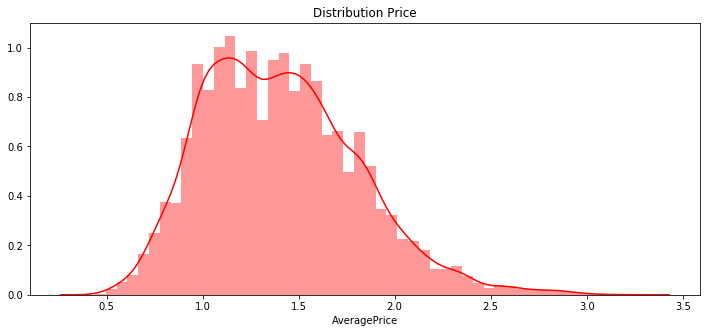

In [8]:
plt.figure(figsize=(12,5))
plt.title('Distribution Price')
sns.distplot(data['AveragePrice'], color='r')

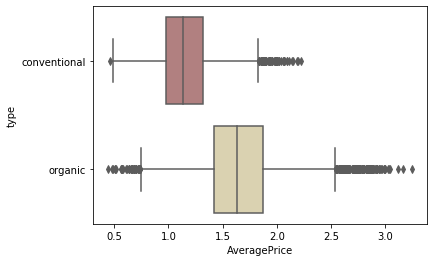

In [9]:
sns.boxplot(x = 'AveragePrice', y = 'type', data=data, palette='pink')

In [10]:
mask = data['type'] == 'organic'

In [12]:
data[mask]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9126,0,2015-12-27,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,0.0,organic,2015,Albany
9127,1,2015-12-20,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,0.0,organic,2015,Albany
9128,2,2015-12-13,1.85,995.96,10.44,178.70,0.00,806.82,806.82,0.00,0.0,organic,2015,Albany
9129,3,2015-12-06,1.84,1158.42,90.29,104.18,0.00,963.95,948.52,15.43,0.0,organic,2015,Albany
9130,4,2015-11-29,1.94,831.69,0.00,94.73,0.00,736.96,736.96,0.00,0.0,organic,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


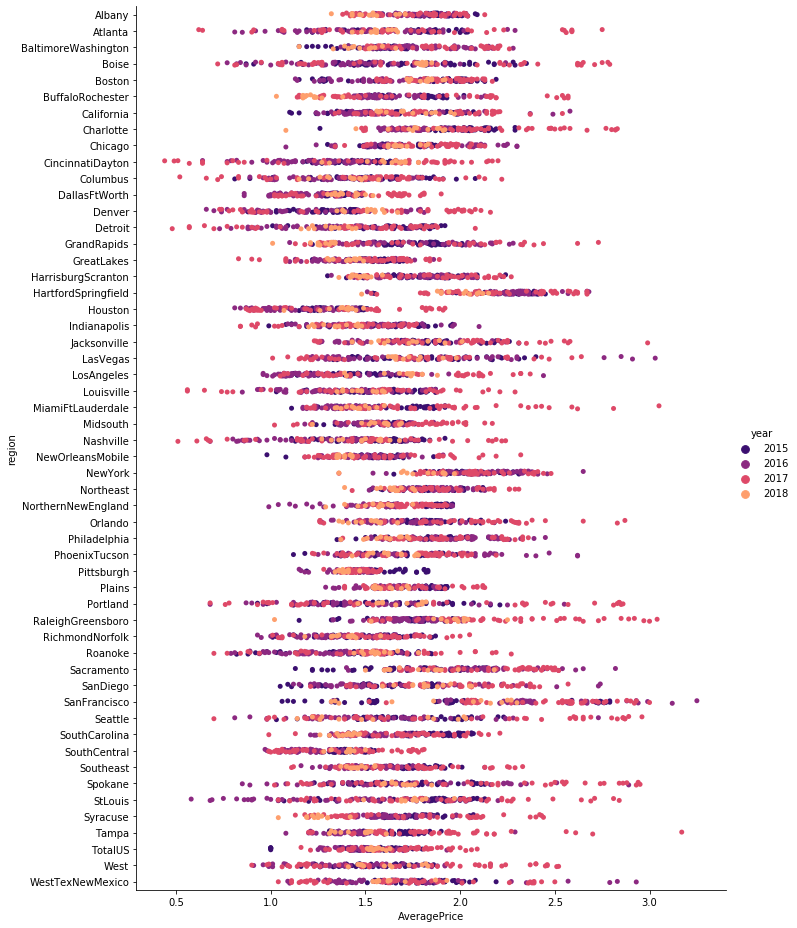

In [16]:
sns.catplot('AveragePrice', 
            'region', 
            data=data[mask], 
            hue='year', 
            height=13, 
            aspect=0.8, 
            palette='magma')

In [17]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

In [18]:
label.fit(data.type.drop_duplicates())

LabelEncoder()

In [20]:
dicts['type'] = list(label.classes_)

In [22]:
data.type = label.transform(data.type)

In [23]:
data.type

0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Name: type, Length: 18249, dtype: int32

In [24]:
cols = ['AveragePrice', 'type', 'year', 'Total Volume', 'Total Bags']
cm = np.corrcoef(data[cols].values.T)

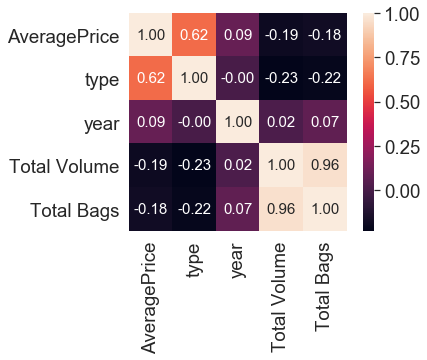

In [25]:
sns.set(font_scale = 1.7)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt='.2f', annot_kws = {'size': 15}, yticklabels = cols, xticklabels = cols)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [31]:
X = data.drop(['type', 'region', 'Date'], axis=1)
y = data.type

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [40]:
logreg = LogisticRegression(penalty='l2', tol=0.0001).fit(X_train, y_train)

In [38]:
print("LogisticRegression train data score:{:.3f}".format(logreg.score(X_train,y_train)))
print("LogisticRegression test data score:{:.3f}".format(logreg.score(X_test,y_test)))

LogisticRegression train data score:0.934
LogisticRegression test data score:0.935


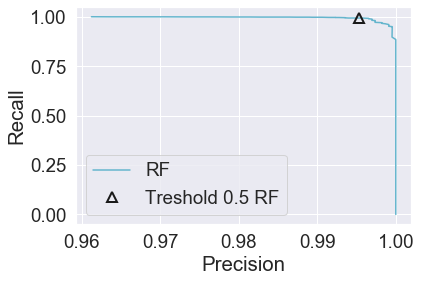

In [45]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.plot(precision_rf, recall_rf, label = 'RF', color = 'c')
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c = 'k', markersize = 10, label = "Treshold 0.5 RF", fillstyle = "none", mew = 2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc = "best")

In [47]:
from sklearn.metrics import average_precision_score
p_rf = average_precision_score(y_test,rf.predict_proba(X_test)[:,1])
print("Average precision score Random Forest Classifier: {:.3f}".format(p_rf))

Average precision score Random Forest Classifier: 1.000


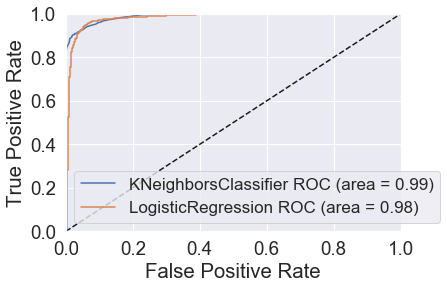

In [50]:
kfold = 7 
result = {} 
trn_train, trn_test, trg_train, trg_test = train_test_split(X, y, test_size=0.25) 
knn = KNeighborsClassifier(n_neighbors = 200) 
log_reg = LogisticRegression(penalty='l2', tol=0.001) 
scores = cross_val_score(knn, X, y, cv = kfold)
result['KNeighborsClassifier'] = scores.mean()
scores = cross_val_score(log_reg, X, y, cv = kfold)
result['LogisticRegression'] = scores.mean()
pl.clf()

knn_result = knn.fit(trn_train, trg_train).predict_proba(trn_test)
fpr, tpr, thresholds = roc_curve(trg_test, knn_result[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('KNeighborsClassifier',roc_auc))

logreg_result = log_reg.fit(trn_train, trg_train).predict_proba(trn_test)
fpr, tpr, thresholds = roc_curve(trg_test, logreg_result[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LogisticRegression',roc_auc))
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.legend(loc=0, fontsize='small')